In [102]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import statsmodels.api as sm
from itertools import product
from math import sqrt
from sklearn.metrics import mean_squared_error 
import scipy
import csv
from scipy import stats
from pylab import rcParams
from scipy.stats.stats import kendalltau
from pylab import rcParams
from plotly import graph_objs as go
import chart_studio.plotly as py
import xlsxwriter
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(rc={"figure.figsize": (20,10), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 })

In [63]:

dataIce = pd.read_excel (r'C:\Users\User\imbie_dataset.xlsx')
ice = pd.DataFrame(dataIce, columns= ['Year','Cumulative_ice_mass_change_in_Gt'])
ice = ice.set_index('Year')
ice.to_excel(r'C:\Users\User\data_coba_ice.xlsx')#membuat file untuk dijadikan 1 file excel untuk mencari korelasi
print (ice)

             Cumulative_ice_mass_change_in_Gt
Year                                         
1992.000000                          4.408333
1992.083333                         11.475004
1992.166667                         19.650000
1992.250000                         10.594821
1992.333333                          9.460705
1992.416667                          7.559929
1992.500000                          7.334150
1992.583333                          9.058373
1992.666667                         11.461758
1992.750000                         13.060979
1992.833333                         12.130226
1992.916667                         13.417776
1993.000000                         16.380044
1993.083333                         20.535372
1993.166667                         23.719865
1993.250000                         26.389565
1993.333333                         26.728695
1993.416667                         22.277962
1993.500000                         16.096298
1993.583333                       

In [65]:
co2 = pd.read_csv('World Atmospheric CO2.csv')
co2.to_excel(r'C:\Users\User\data_coba_co2.xlsx')#membuat file untuk dijadikan 1 file excel untuk mencari korelasi
co2 = co2.set_index('year')
print (co2)

      month  average   trend
year                        
1992      1   356.43  355.64
1992      2   356.78  355.65
1992      3   357.16  355.70
1992      4   357.66  355.86
1992      5   357.73  356.09
1992      6   356.78  356.18
1992      7   355.09  356.22
1992      8   353.58  356.14
1992      9   353.49  356.05
1992     10   354.70  356.10
1992     11   355.87  356.12
1992     12   356.63  356.14
1993      1   357.09  356.26
1993      2   357.43  356.28
1993      3   357.84  356.40
1993      4   358.31  356.55
1993      5   358.26  356.61
1993      6   357.23  356.57
1993      7   355.61  356.62
1993      8   354.33  356.79
1993      9   354.35  356.93
1993     10   355.59  357.06
1993     11   356.83  357.18
1993     12   357.73  357.36
1994      1   358.34  357.49
1994      2   358.87  357.72
1994      3   359.22  357.77
1994      4   359.58  357.80
1994      5   359.61  357.93
1994      6   358.68  357.97
...     ...      ...     ...
2015      1   399.32  398.27
2015      2   

In [85]:
co2.head()

,month,average,trend
year,,,
1992,1,356.43,355.64
1992,2,356.78,355.65
1992,3,357.16,355.70
1992,4,357.66,355.86
1992,5,357.73,356.09


In [86]:
co2.tail()

,month,average,trend
year,,,
2017,2,405.69,404.30
2017,3,406.10,404.43
2017,4,406.39,404.55
2017,5,406.43,404.80
2017,6,405.64,405.08


In [87]:
earthtemp = pd.read_csv('berkley_earth_GlobalTemperatures.csv')
earthtemp.to_excel(r'C:\Users\User\data_coba_temp.xlsx') #membuat file untuk dijadikan 1 file excel untuk mencari korelasi
earthtemp = earthtemp.set_index('dt')


In [88]:
earthtemp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
earthtemp.tail()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [68]:
combined_data = pd.read_excel (r'C:\Users\User\data_gabungan.xlsx')
combined_data = combined_data.set_index('year','month')
print(combined_data)

      month  Cumulative ice mass change (Gt)  average CO2  \
year                                                        
1992      1                         4.408333       356.43   
1992      2                        11.475004       356.78   
1992      3                        19.650000       357.16   
1992      4                        10.594821       357.66   
1992      5                         9.460705       357.73   
1992      6                         7.559929       356.78   
1992      7                         7.334150       355.09   
1992      8                         9.058373       353.58   
1992      9                        11.461758       353.49   
1992     10                        13.060979       354.70   
1992     11                        12.130226       355.87   
1992     12                        13.417776       356.63   
1993      1                        16.380044       357.09   
1993      2                        20.535372       357.43   
1993      3             

In [92]:
combined_data.head()

,month,Cumulative ice mass change (Gt),average CO2,LandAverageTemperature
year,,,,
1992,1,4.408333,356.43,3.579
1992,2,11.475004,356.78,3.931
1992,3,19.650000,357.16,5.952
1992,4,10.594821,357.66,8.572
1992,5,9.460705,357.73,11.535


In [69]:
pearsoncorr = combined_data.corr(method='pearson')
pearsoncorr

,month,Cumulative ice mass change (Gt),average CO2,LandAverageTemperature
month,1.000000,0.003155,-0.057668,0.260968
Cumulative ice mass change (Gt),0.003155,1.000000,-0.952010,-0.053923
average CO2,-0.057668,-0.952010,1.000000,-0.003561
LandAverageTemperature,0.260968,-0.053923,-0.003561,1.000000


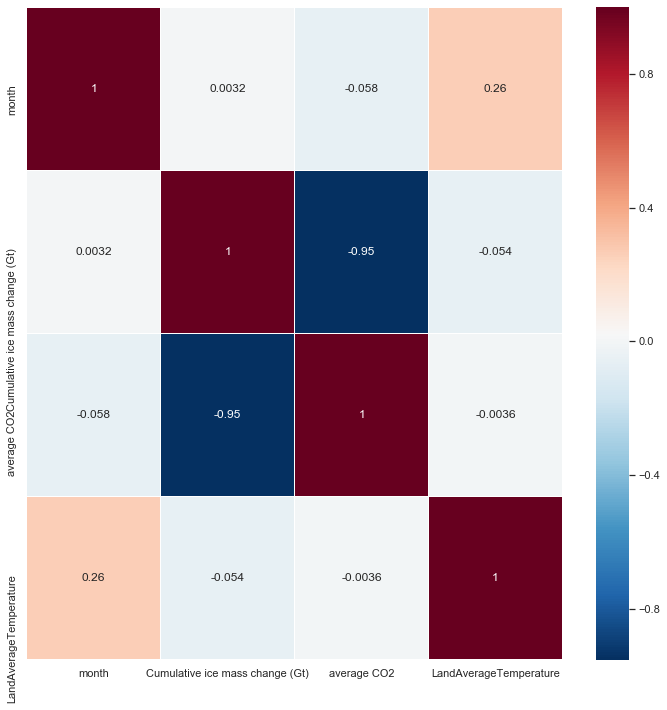

In [99]:
import seaborn as sb
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

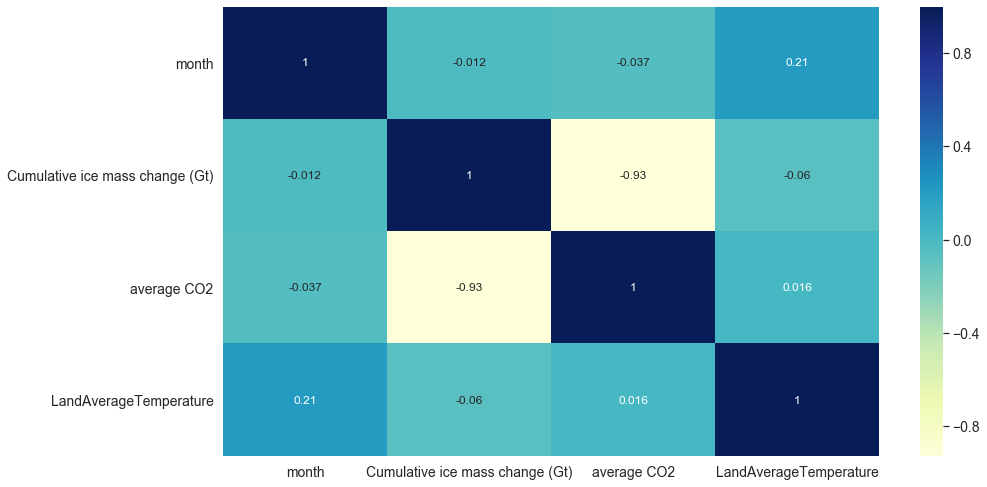

In [71]:
from pylab import rcParams
corr = combined_data.corr(method='kendall')
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

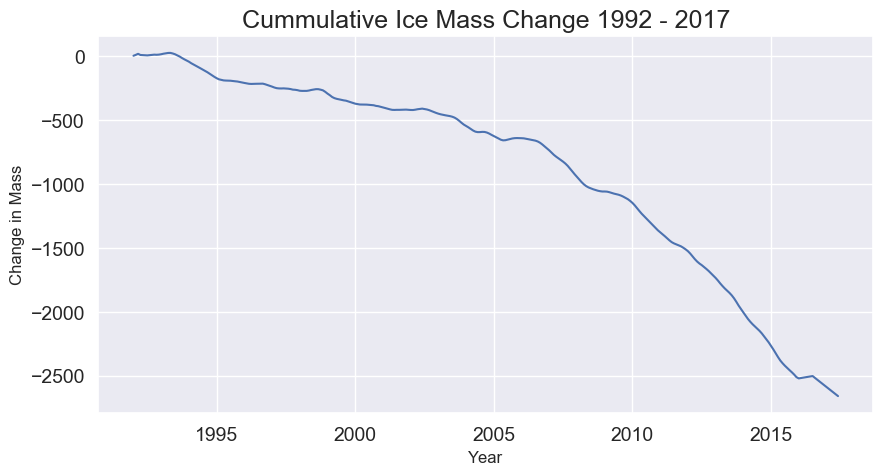

In [72]:
plt.figure(figsize=[10,5], dpi=100)

plt.plot(ice)

plt.title('Cummulative Ice Mass Change 1992 - 2017')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Change in Mass', fontsize=12)

plt.show()

In [84]:
ice.head()

,Cumulative_ice_mass_change_in_Gt
Year,
1992.000000,4.408333
1992.083333,11.475004
1992.166667,19.650000
1992.250000,10.594821
1992.333333,9.460705


In [83]:
ice.tail()

,Cumulative_ice_mass_change_in_Gt
Year,
2017.083333,-2600.943028
2017.166667,-2615.200528
2017.250000,-2629.458028
2017.333333,-2643.715528
2017.416667,-2657.973028


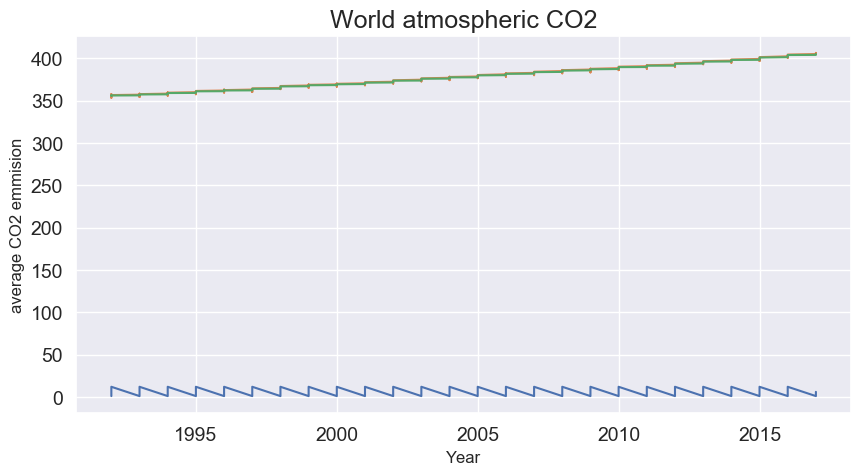

In [74]:
plt.figure(figsize=[10,5], dpi=100)

plt.plot(co2)

plt.title('World atmospheric CO2')
plt.xlabel('Year', fontsize=12)
plt.ylabel('average CO2 emmision', fontsize=12)

plt.show()

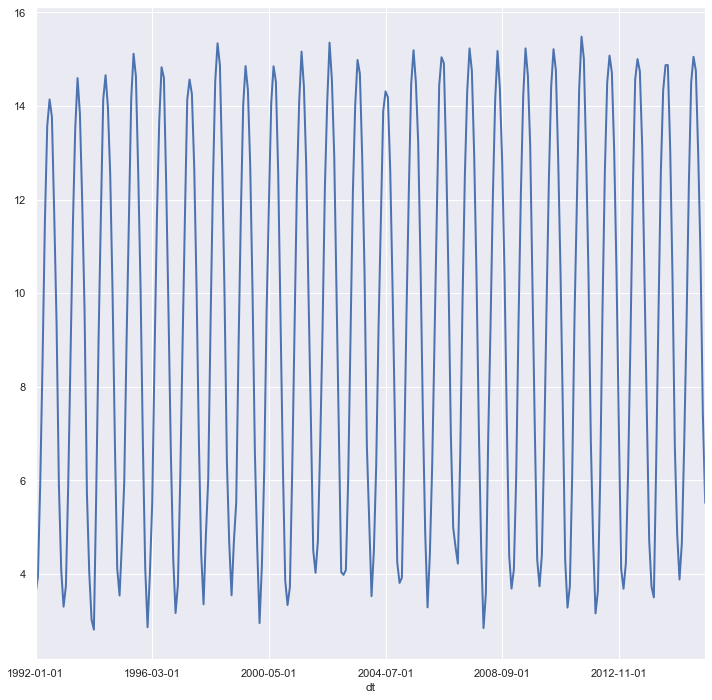

In [91]:
sns.set(rc={'figure.figsize':(12, 12)})
LandAverageTemperature = earthtemp['LandAverageTemperature']
earthtemp.loc['1992-01-01': '2015-12-01', 'LandAverageTemperature'].plot(linewidth=2);

In [76]:
model = pm.auto_arima(ice.Cumulative_ice_mass_change_in_Gt, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1445.587, BIC=1460.469, Fit time=0.100 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=2159.159, BIC=2166.600, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=1463.684, BIC=1474.845, Fit time=0.038 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1825.887, BIC=1837.048, Fit time=0.062 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=2385.019, BIC=2388.740, Fit time=0.016 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1441.460, BIC=1460.062, Fit time=0.107 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=1441.025, BIC=1455.906, Fit time=0.050 seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=1440.812, BIC=1459.413, Fit time=0.090 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=1442.667, BIC=1464.989, Fit time=0.171 seconds
Total fit time: 0.636 seconds
       

Loading
..........................................

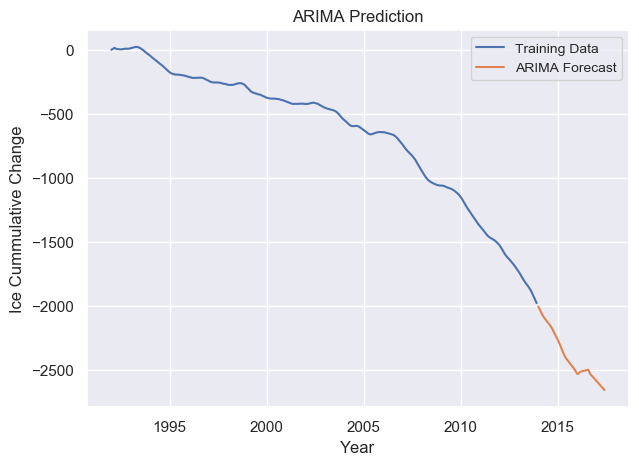

In [77]:
dataPr = ice.Cumulative_ice_mass_change_in_Gt.values

train = dataPr[:264]
test = dataPr[264:]

history = [x for x in train]
predictions = []

print('Loading')

for t in range(len(test)):
    model = ARIMA(history, order=[1, 1, 0]) # Training Data (WAJIB)
    
    fit = model.fit() # Fit Model (WAJIB)
    
    hasil = fit.forecast()[0] # Hasil prediksi
    
    predictions.append(hasil) # Tambahkan hasil ke list prediksi
    
    history.append(test[t]) # Tambahkan data tahun tersebut untuk ARIMA selanjutnya

    print('.', end='')


#----------------------------------------------Visualisation-------------------------------------#

plt.figure(figsize=[7,5], dpi=100)

train_df = pd.DataFrame(train, index=ice.index[0:264])
test_df = pd.DataFrame(test, index=ice.index[264:])
predictions_df = pd.DataFrame(predictions, index=ice.index[264:])

plt.plot(train_df, label='Training Data')
plt.plot(predictions_df, label='ARIMA Forecast')

plt.title('ARIMA Prediction')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Ice Cummulative Change', fontsize=12)
plt.show()

In [100]:
model = pm.auto_arima(sea.Cumulative_sea_level_contribution_in_mm, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-2144.611, BIC=-2129.729, Fit time=0.205 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-1431.364, BIC=-1423.924, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-2126.635, BIC=-2115.474, Fit time=0.039 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-1764.636, BIC=-1753.475, Fit time=0.137 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-1205.504, BIC=-1201.784, Fit time=0.016 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-2148.485, BIC=-2129.884, Fit time=0.131 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-2149.330, BIC=-2134.449, Fit time=0.069 seconds
Fit ARIMA: order=(3, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-2149.539, BIC=-2130.937, Fit time=0.079 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-2147.088, BIC=-2124.766, Fit time=0.252 seconds
Total fit time: 0.9

Loading
..........................................

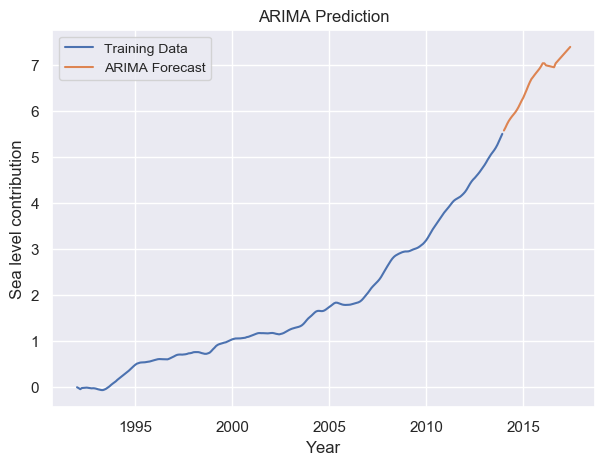

In [101]:
sea = pd.DataFrame(dataIce, columns= ['Year','Cumulative_sea_level_contribution_in_mm'])
sea = sea.set_index('Year')
dataPre = sea.Cumulative_sea_level_contribution_in_mm.values

train = dataPre[:264]
test = dataPre[264:]

history = [x for x in train]
predictions = []

print('Loading')

for t in range(len(test)):
    model = ARIMA(history, order=[1, 1, 0]) # Training Data (WAJIB)
    
    fit = model.fit() # Fit Model (WAJIB)
    
    hasil = fit.forecast()[0] # Hasil prediksi
    
    predictions.append(hasil) # Tambahkan hasil ke list prediksi
    
    history.append(test[t]) # Tambahkan data tahun tersebut untuk ARIMA selanjutnya

    print('.', end='')


#----------------------------------------------Visualisation-------------------------------------#

plt.figure(figsize=[7,5], dpi=100)

train_df = pd.DataFrame(train, index=sea.index[0:264])
test_df = pd.DataFrame(test, index=sea.index[264:])
predictions_df = pd.DataFrame(predictions, index=sea.index[264:])

plt.plot(train_df, label='Training Data')
plt.plot(predictions_df, label='ARIMA Forecast')

plt.title('ARIMA Prediction')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea level contribution', fontsize=12)
plt.show()